In [2]:
import pyforest as py 


In [3]:
df = pd.read_csv("womentrackrecords.csv")

<IPython.core.display.Javascript object>

In [4]:
print(df.head())

     COUNTRY     X1     X2     X3    X4    X5    X6      X7
0  Argentina  11.61  22.94  54.50  2.15  4.43  9.79  178.52
1  Australia  11.20  22.35  51.80  1.98  4.13  9.08  152.37
2    Austria  11.43  23.09  50.62  1.99  4.22  9.34  159.37
3    Belgium  11.41  23.04  52.00  2.00  4.14  8.88  157.85
4    Bermuda  11.46  23.05  53.30  2.16  4.58  9.81  169.98


In [5]:
X = df.iloc[:, 1:8]

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [7]:
print(X_scaled[:5])  

[[-0.02244285 -0.56223724  0.30020929  0.68667744  0.08068672  0.39398374
   0.17449621]
 [-0.94259964 -1.08128697 -0.61109652 -0.89861492 -0.68007382 -0.25163376
  -0.69187071]
 [-0.42641412 -0.43027544 -1.00937091 -0.80536243 -0.45184566 -0.01521045
  -0.45995605]
 [-0.47129982 -0.4742627  -0.54359238 -0.71210993 -0.65471513 -0.43349784
  -0.51031466]
 [-0.35908558 -0.46546525 -0.10481551  0.77992993  0.461067    0.41217014
  -0.10843968]]


# PERFORM BARTLET TEST
### Test hypothesis there is a correlation existing among the features 

In [8]:
import pandas as pd
from scipy.stats import bartlett
from sklearn.preprocessing import StandardScaler

# Load the df from CSV
df = pd.read_csv("womentrackrecords.csv")

# Assuming you have seven groups represented by seven columns in your DataFrame

group1 = df['X1']  # Replace 'Group1' with the actual column name representing Group 1
group2 = df['X2']  # Replace 'Group2' with the actual column name representing Group 2
group3 = df['X3']  # Replace 'Group3' with the actual column name representing Group 3
group4 = df['X4']  # Replace 'Group4' with the actual column name representing Group 4
group5 = df['X5']  # Replace 'Group5' with the actual column name representing Group 5
group6 = df['X6']  # Replace 'Group6' with the actual column name representing Group 6
group7 = df['X7']  # Replace 'Group7' with the actual column name representing Group 7

# Combine the groups into a 2D array
groups_data = pd.concat([group1, group2, group3, group4, group5, group6, group7], axis=1)

# Perform standard scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(groups_data)
# Perform Bartlett's test
statistic, p_value = bartlett(*scaled_data.T)

# Interpret the results
alpha = 0.05
print("Bartlett Test Results:")
print("Statistic:", statistic)
print("P-value:", p_value)
if p_value < alpha:
    print("Reject null hypothesis: The variances are not equal.")
else:
    print("Fail to reject null hypothesis: The variances are equal.")


Bartlett Test Results:
Statistic: 2.3812825616793726e-14
P-value: 1.0
Fail to reject null hypothesis: The variances are equal.


# KMO TEST
### It measures the proportion of variance that might be common among the variables .

In [9]:
import pandas as pd
from factor_analyzer.factor_analyzer import calculate_kmo
from sklearn.preprocessing import StandardScaler

# Load the df from CSV
df = pd.read_csv("womentrackrecords.csv")

# Assuming you have seven groups represented by seven columns in your DataFrame

group1 = df['X1']  
group2 = df['X2']  
group3 = df['X3'] 
group4 = df['X4']  
group5 = df['X5']  
group6 = df['X6']  
group7 = df['X7']  

# Combine the groups into a 2D array
groups_data = pd.concat([group1, group2, group3, group4, group5, group6, group7], axis=1)

# Perform standard scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(groups_data)

# Perform KMO test
kmo_all, kmo_model = calculate_kmo(scaled_data)

# Interpret the results
print("KMO Test Results:")
print("Overall KMO:", kmo_model)

KMO Test Results:
Overall KMO: 0.8902963658277505


 ### A KMO value closer to 1 suggests that the variables are well-suited for factor analysis, indicating strong patterns of correlation among the variables.
### Generally, a KMO value above 0.6 is considered acceptable, while values closer to 1 indicate better suitability for factor analysis

In [10]:
import pandas as pd
df = pd.read_csv("womentrackrecords.csv")

X = df.iloc[:, 1:8]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

from factor_analyzer import FactorAnalyzer
## we have decided to only have two factor hence n_factors=2 
fa = FactorAnalyzer(n_factors=2, rotation="varimax", method="principal", 
                    is_corr_matrix=False)
fa.fit(X_scaled)

print("Eigenvalues:")
print(fa.get_eigenvalues()[0])
print()
print("Communalities:")
print(fa.get_communalities())
print()
print("Specific Variances:")
print(fa.get_uniquenesses())
print()
print("Factor Loadings:")
print(fa.loadings_)

Eigenvalues:
[5.06759677 0.6020256  0.44429295 0.36590389 0.26931274 0.13929091
 0.11157713]

Communalities:
[0.8632044  0.86854473 0.77623794 0.84827979 0.79619776 0.73826138
 0.77889637]

Specific Variances:
[0.1367956  0.13145527 0.22376206 0.15172021 0.20380224 0.26173862
 0.22110363]

Factor Loadings:
[[0.8399412  0.3971186 ]
 [0.86109019 0.35646657]
 [0.81415209 0.33674071]
 [0.61543129 0.6852183 ]
 [0.22614824 0.86316553]
 [0.48965453 0.7060452 ]
 [0.46668107 0.74906952]]


Text(0.5, 1.0, 'Scree Plot')

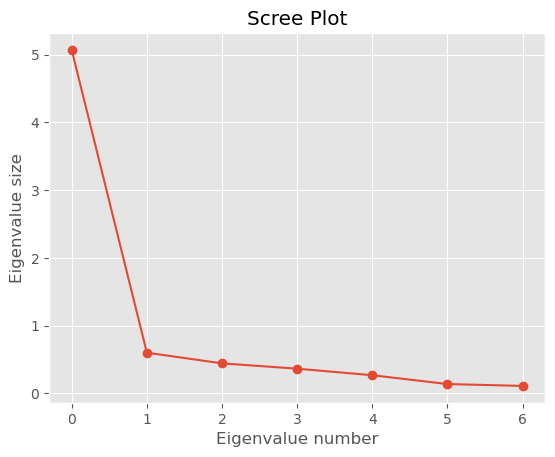

In [11]:
# Lets plot a scree plot to identify values greater than one 

import matplotlib.pyplot as plt
plt.style.use("ggplot")

plt.plot(fa.get_eigenvalues()[0], marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")

In [12]:
# Only two factors have eigen values which are or greater than 1 that is column 0 and 1 i.e factors which explain variance more than a single observed variable 
transformed_df = pd.DataFrame(fa.transform(X_scaled), columns=['RF1', 'RF2'])
transformed_df.to_csv("track_records_81_var.csv", index=False)
transformed_df.to_excel("track_records_81_var.xlsx", index=False)

C:\Users\25470\AppData\Local\Temp\ipykernel_11436\3667315942.py:4: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  transformed_df.to_excel("track_records_81_var.xlsx", index=False)


# CRONBACH ALPHA 
### It is used to measure if our factors are good 
##### it can be used to measure whether or not variables of a factor form a coherent and reliable factor .A value of above 0.6 is deemed acceptable 

In [15]:
import pingouin as pg
#Create the factors
speed = df[['X1', 'X2', 'X3', 'X4']]
endurance_tolerance = df[[ 'X5', 'X6','X7']]
#Get cronbach alpha
speed = pg.cronbach_alpha(speed)
endurance_tolerance = pg.cronbach_alpha(endurance_tolerance)

print(speed, endurance_tolerance)


(0.5952803628635827, array([0.387, 0.745])) (0.0963812944773404, array([-0.414,  0.443]))
